# Yandex.Afisha marketing analysis

The aim of our analysis is to:
1. Study how people use the product;
2. Find out when they start to buy;
3. Calculate how much money each customer brings;
4. Find out when they pay off.

## Analysis Plan:
1. Data pre-processing,
2. Product analysis (MAU, WAU, DAU; number of sessions per day per user; session's length; User Retention)
3. Sales analysis (first purchase, amount of purchases in a given time, average purchase size, LTV, Conversion Rate)
4. Marketing (overall costs, CAC per source, ROI);
5. Conclusion and recommendations.

## Table of Contents:
1. [Data preprocessing](#1.-Data-preprocessing)
2. [Product Analysis](#2.-Product-Analysis)
    - [How many people use it every day, week, and month?](#How-many-people-use-it-every-day,-week,-and-month?)
    - [How many sessions are there per day?](#How-many-sessions-are-there-per-day?)
    - [What is the length of each session?](#What-is-the-length-of-each-session?)
    - [How often do users come back?](#How-often-do-users-come-back?)
3. [Sales Analysis](#3.-Sales-Analysis)
    - [When do people start buying?](#When-do-people-start-buying?)
    - [How many orders do they make during a given period of time?](#How-many-orders-do-they-make-during-a-given-period-of-time?)
    -[What is the average purchase size?](#What-is-the-average-purchase-size?)
    -[How much money do they bring? (LTV)](#How-much-money-do-they-bring?-(LTV))
4. [Marketing Analysis](#4.-Marketing-Analysis)
    -[How much money was spent? Overall/per source/over time](#How-much-money-was-spent?-Overall/per-source/over-time)
    - [How much did customer acquisition from each of the sources cost?](#How-much-did-customer-acquisition-from-each-of-the-sources-cost?)
    - [How worthwhile where the investments? (ROI)](#How-worthwhile-where-the-investments?-(ROI))
 5. [Conclusion and recommendations](#5.-Conclusion-and-recommendations)

### 1. Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/Users/maja/Downloads/'
visits=pd.read_csv(path + 'visits_log_us.csv')
orders=pd.read_csv(path + 'orders_log_us.csv')
costs=pd.read_csv(path + 'costs_us.csv')

After importing the data, we will start off by looking at each data frame.

#### a) Visits

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


We can see that there are no missing values in the data frame. 

Looking at the data types in `visits`, we can see that the columns:
    - `End Ts`
    - `Start Ts`
need to have their data type changed to datetime format.

In [4]:
visits.columns = visits.columns.str.lower()

In [5]:
visits['end ts']=pd.to_datetime(visits['end ts'])
visits['start ts']=pd.to_datetime(visits['start ts'])

In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end ts     359400 non-null  datetime64[ns]
 2   source id  359400 non-null  int64         
 3   start ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


The data type was successfully changed.

In [7]:
visits.describe()

,source id,uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [8]:
visits.describe(include=object)

,device
count,359400
unique,2
top,desktop
freq,262567


In [9]:
duplicate_rows_visits = visits[visits.duplicated()]
duplicate_rows_visits

,device,end ts,source id,start ts,uid


There are no duplicates in this data frame.

In [10]:
visits.tail(12)

,device,end ts,source id,start ts,uid
359388,desktop,2017-12-11 08:32:19,2,2017-12-11 08:32:00,18234509934089525145
359389,desktop,2018-05-30 08:45:19,4,2018-05-30 08:45:00,18236711326069636433
359390,desktop,2017-12-11 17:54:19,1,2017-12-11 17:54:00,18268369011883553090
359391,touch,2017-08-30 11:53:19,2,2017-08-30 11:53:00,18304232853749481866
359392,desktop,2017-12-30 21:49:19,4,2017-12-30 21:49:00,18311497973035795342
359393,desktop,2017-06-08 07:49:19,4,2017-06-08 07:49:00,18325675073358289850
359394,touch,2017-11-06 08:00:19,4,2017-11-06 08:00:00,18332905065174083046
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294


In order receive the data on the actual visits, we will filter out visits which lasted below 10 seconds as they seemed to be visits "by mistake".

In [11]:
visits['visit_duration_sec'] = (visits['end ts'] - visits['start ts']).dt.seconds 

In [12]:

visits[visits['visit_duration_sec']<5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35794 entries, 2 to 358529
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   device              35794 non-null  object        
 1   end ts              35794 non-null  datetime64[ns]
 2   source id           35794 non-null  int64         
 3   start ts            35794 non-null  datetime64[ns]
 4   uid                 35794 non-null  uint64        
 5   visit_duration_sec  35794 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(1), uint64(1)
memory usage: 1.9+ MB


In [13]:
visits=visits[visits.visit_duration_sec > 5].reset_index()
visits[visits['visit_duration_sec']<5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               0 non-null      int64         
 1   device              0 non-null      object        
 2   end ts              0 non-null      datetime64[ns]
 3   source id           0 non-null      int64         
 4   start ts            0 non-null      datetime64[ns]
 5   uid                 0 non-null      uint64        
 6   visit_duration_sec  0 non-null      int64         
dtypes: datetime64[ns](2), int64(3), object(1), uint64(1)
memory usage: 0.0+ bytes


`Visits` data frame is ready for further analysis.

#### b) Orders

In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


There are no missing values in the data frame.

In [15]:
orders.columns = orders.columns.str.lower()

The `buy ts` column's data type should be changed to datetime.

In [16]:
orders['buy ts']=pd.to_datetime(orders['buy ts'])

In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


The data type was successfully converted.

In [18]:
orders.describe()

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


We can see that the revenue made of some of the purchases is 0, we are going to look closer at these rows in order to decide whether the data is missing or perhaps they refer to free products.

In [19]:
orders[orders['revenue'] == 0]

,buy ts,revenue,uid
1802,2017-06-22 18:19:00,0.0,17030528792926543083
2787,2017-07-07 15:54:00,0.0,10281425020415612933
4783,2017-08-02 14:54:00,0.0,184148767273119549
5095,2017-08-09 14:48:00,0.0,5603453646174104178
5863,2017-08-23 13:43:00,0.0,5603453646174104178
6393,2017-08-30 16:30:00,0.0,5603453646174104178
6995,2017-09-06 13:57:00,0.0,5603453646174104178
7104,2017-09-07 14:37:00,0.0,5603453646174104178
7488,2017-09-11 16:53:00,0.0,10169885790465067808
8160,2017-09-18 16:49:00,0.0,2883839899480223178


We can see that in case of purchases of 0 cost no other data seemed to be missing. It is therefore assumed that the values are not missing at random and might refer to products which were free of charge.

In [20]:
orders.describe()

,revenue,uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [21]:
duplicate_rows_orders = orders[orders.duplicated()]
duplicate_rows_orders

,buy ts,revenue,uid


In [22]:
orders.sample()

,buy ts,revenue,uid
16507,2017-11-07 17:05:00,3.97,7511323685267322097


In [23]:
orders.tail(5)

,buy ts,revenue,uid
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247
50414,2018-06-01 00:02:00,3.42,83872787173869366


`Orders` data frame is ready to be analyzed.

#### c) Costs

In [24]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


We can see that there are no null values in the data frame

In [25]:
costs.sample()

,source_id,dt,costs
2475,10,2018-03-24,21.94


The data type of `dt` column should be changed to datetime.

In [26]:
costs['dt']=pd.to_datetime(costs['dt'])

In [27]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


The data type was successfully converted

In [28]:
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [29]:
duplicate_rows_costs = costs[costs.duplicated()]
duplicate_rows_costs

,source_id,dt,costs


`Costs` data frame is ready to be analyzed.

#### Conclusion: 
We have examined each of the data frames and changed data type of specific columns in order to reflect the data they contain. 

Although for convenience of the analysis it might be desireable to merge the tables together, due to the data they contain we will not merge the whole tables to prevent confusion in the upcoming analysis.

### 2. Product Analysis

We will now begin analysis of the product using the `visits` table.

#### How many people use it every day, week, and month?

In order to analyse how many people use the product daily, weekly and monthly, we will add the following columns to the table: 
- `visit_day`
- `visit_week`
- `visit_month`.

In [30]:
visits['visit_day'] = visits['start ts'].astype('datetime64[D]')
visits['visit_week'] = visits['start ts'].astype('datetime64[W]')
visits['visit_month'] = visits['start ts'].astype('datetime64[M]')
visits.tail(5) 

,index,device,end ts,source id,start ts,uid,visit_duration_sec,visit_day,visit_week,visit_month
323601,359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,19,2017-07-29,2017-07-27,2017-07-01
323602,359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,19,2018-01-25,2018-01-25,2018-01-01
323603,359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,19,2018-03-03,2018-03-01,2018-03-01
323604,359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,19,2017-11-02,2017-11-02,2017-11-01
323605,359399,touch,2017-09-10 13:13:19,2,2017-09-10 13:13:00,18396128934054549559,19,2017-09-10,2017-09-07,2017-09-01


In [31]:
dau=visits.groupby(['visit_day']).agg({'uid': 'nunique'}).reset_index()
dau.mean().astype(int)

<ipython-input-31-98a95dbd9b06>:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



uid    817
dtype: int64

In [32]:
wau=visits.groupby(['visit_week']).agg({'uid': 'nunique'}).reset_index()
wau.mean().astype(int)

<ipython-input-32-57e88f324274>:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



uid    5155
dtype: int64

In [33]:
mau=visits.groupby(['visit_month']).agg({'uid': 'nunique'}).reset_index()
mau.mean().astype(int)

<ipython-input-33-2bbcbb5201e0>:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



uid    20955
dtype: int64

We found out that the average number of users visting daily is 817, whereas weekly equlas to 5155, and monthly to 20955.

In [128]:
fig = px.bar(mau, x='visit_month', y='uid', title= 'MAU', labels={'visit_month':'Month','uid':'Number of Users'})
fig.show("png")

From the MAU values throughout the year we can see that there was a significant growth in September 2017 and even bigger increase in the number of users in October 2017. The peak in the number of users was reached in November. The month with the lowest number of users was in August.

In April 2018, however, there was a decrease in the number of users which continued onwards. 

In [35]:
fig = px.bar(wau, x='visit_week', y='uid', title='WAU', labels={'visit_week':'Week','uid':'Number of Users'})
fig.show()

Looking at the WAU data from the period examined, we can follow a bit more the dynamics of the increase and decrease in the number of users. 
The number of users grew steadily from the first week of August 2017 and reached a rapid increase in the 4th week of November. Another rapid increase took place in the 4th week of March, however, it was followed by a rapid decrease in the following week.

In [36]:

fig = px.line(dau, x="visit_day", y="uid", title='DAU', labels={'visit_date':'Date','uid':'Number of Users'})
fig.show()

The line graph representing DAU, we can see the trend of unique users visiting the product a bit clearer. 

1. There is a repeating pattern of low-high-low which usually takes place within 6-8 days;
2. There are two outstanding days in the number of users: the high on 24th November, the low on 31st March. 

In order to understand the dynamics better, the following questions should be answered: 
- what caused the massive increase in the number of users on November 24th? 
- why was there only one user visiting the site on the 31st of March? Was this caused by technical problems on the site?

#### How many sessions are there per day?

In [37]:
visits_daily=visits.groupby(['visit_day']).agg({'uid': 'count'}).reset_index()
visits_daily.mean().astype(int)

<ipython-input-37-9be279b9af80>:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



uid    889
dtype: int64

There are on average 889 sessions per day.

In [38]:
fig = px.line(visits_daily, x='visit_day', y='uid', title='Sessions per day', labels={'visit_day':'Day','uid':'Number of Visits'})
fig.show()

Looking at the daily visits statistics, we can see that at the end of September the number incresed and remained above 1000, however, after the rapid decrease on March 30th, the number of visits remained below that figure for most part. 

#### What is the length of each session?

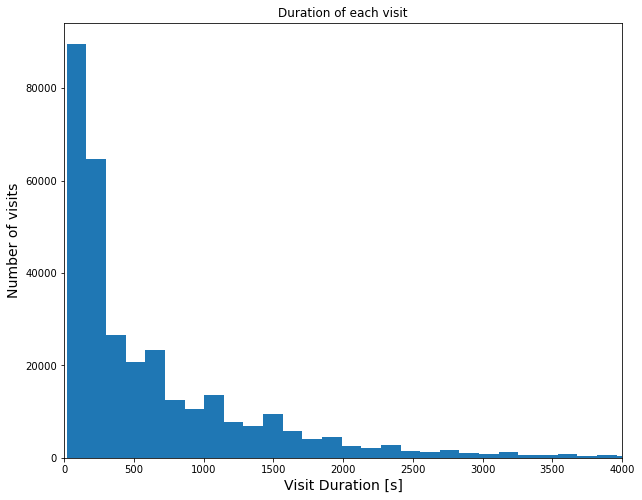

In [39]:

plt.figure(figsize=[10,8])
plt.xlabel('Visit Duration [s]', fontsize=14)
plt.ylabel('Number of visits', fontsize=14)
plt.xlim(xmin=0, xmax = 4000)
plt.title('Duration of each visit')
plt.hist(visits['visit_duration_sec'], bins = 600)
plt.show()

The histogram shows that the distribution is extremely skewed to the right. Therefore, in order to find the average visit length (ASL), we will use 'mode' instead of 'mean' or 'median' value.

In [40]:
asl=visits['visit_duration_sec']
asl.mode()

0    60
dtype: int64

The ASL was found to be 60 seconds.

In [41]:
visits['visit_duration_sec'].describe()

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: visit_duration_sec, dtype: float64

In [42]:
length_per_device=visits.groupby(['device']).agg({'visit_duration_sec': 'sum'}).reset_index()
fig = px.bar(length_per_device, x="device", y="visit_duration_sec", color="device", title="Visit lenght per device")
fig.show()

It turns out that the users spent 4X more time visiting the product using desktop rather than touch devices.

#### How often do users come back?

To address the question how often do users come back, we will calulate the retention rate for each of the cohorts.

In [43]:
first_visit_date = visits.groupby(['uid'])['start ts'].min()
first_visit_date.name ='first_visit_date'
first_visit_date=first_visit_date.reset_index()
visits=visits.merge(first_visit_date, on='uid', how='right')
visits.head()

,index,device,end ts,source id,start ts,uid,visit_duration_sec,visit_day,visit_week,visit_month,first_visit_date
0,196543,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,11863502262781,360,2018-03-01,2018-03-01,2018-03-01,2018-03-01 17:27:00
1,257333,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,49537067089222,120,2018-02-06,2018-02-01,2018-02-01,2018-02-06 15:55:00
2,173818,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,297729379853735,60,2017-06-07,2017-06-01,2017-06-01,2017-06-07 18:47:00
3,113873,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,313578113262317,360,2018-03-11,2018-03-08,2018-03-01,2017-09-18 22:49:00
4,173142,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,1080,2017-09-18,2017-09-14,2017-09-01,2017-09-18 22:49:00


In [44]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

In [45]:
visits['cohort_lifetime'] = visits['visit_month'] - visits['first_visit_month']
visits['cohort_lifetime'] =visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int) 
visits.head()

,index,device,end ts,source id,start ts,uid,visit_duration_sec,visit_day,visit_week,visit_month,first_visit_date,first_visit_month,cohort_lifetime
0,196543,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,11863502262781,360,2018-03-01,2018-03-01,2018-03-01,2018-03-01 17:27:00,2018-03-01,0
1,257333,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,49537067089222,120,2018-02-06,2018-02-01,2018-02-01,2018-02-06 15:55:00,2018-02-01,0
2,173818,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,297729379853735,60,2017-06-07,2017-06-01,2017-06-01,2017-06-07 18:47:00,2017-06-01,0
3,113873,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,313578113262317,360,2018-03-11,2018-03-08,2018-03-01,2017-09-18 22:49:00,2017-09-01,6
4,173142,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,1080,2017-09-18,2017-09-14,2017-09-01,2017-09-18 22:49:00,2017-09-01,0


In [46]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 

In [47]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

In [48]:
cohorts = cohorts.merge(initial_users_count,on='first_visit_month') 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
retention_pivot = cohorts.pivot_table(index='first_visit_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot.head()

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,1.0,0.075726,0.050989,0.059739,0.065377,0.067480,0.057720,0.056121,0.050989,0.049727,0.038115,0.043921
2017-07-01,1.0,0.054545,0.050402,0.055645,0.056660,0.046512,0.044059,0.044059,0.037886,0.027315,0.027061,NaN
2017-08-01,1.0,0.074452,0.060451,0.060451,0.047970,0.041459,0.036249,0.037660,0.027133,0.024745,NaN,NaN
2017-09-01,1.0,0.083570,0.067769,0.049322,0.038083,0.036959,0.035372,0.022876,0.022744,NaN,NaN,NaN
2017-10-01,1.0,0.078129,0.050811,0.037811,0.033648,0.031184,0.020775,0.019798,NaN,NaN,NaN,NaN


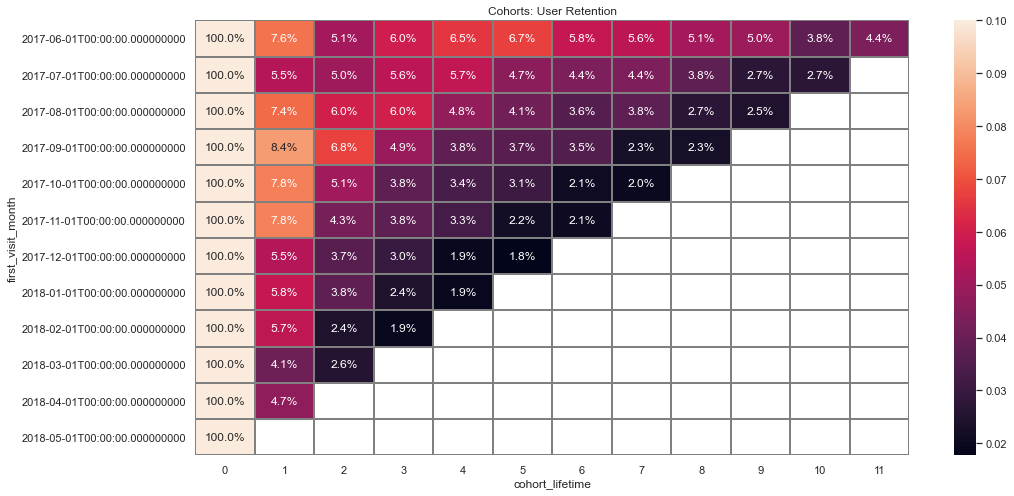

In [49]:
sns.set(style='white')
plt.figure(figsize=(16, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmax=0.1, linewidths=1, linecolor='gray'); 

The heatmap above clearly shows that the first cohort had the best results when it comes to User Retention. Till the 11th month, 4.5% of users came back to use the product. The other cohorts haven't reached almost half as good of results by the 10th month at most. Although a slight increase in user retention in the fourth cohort, The general trend visible on the heatmap shows that the amount of users who came back to use the product has been decreasing with each cohort.

November as the month with the highest amount of users using the product, achieved slightly higher results than the the corresponding lifetime months of other cohorts.

According to profitwell.com, although the retention rate will vary across the industries, usually the score of 15% is among the low results. As we can see from the table above, the retention was much below this level and therefore this metric should be looked at as one of the aspects to improve. 

In order to have a better understanding how often do the users come back, we will also look at the Stick Factor of the product:

In [50]:
((dau.mean().astype(int))/(mau.mean().astype(int)))*100

<ipython-input-50-b2df9dc42ae7>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



uid    3.898831
dtype: float64

We can see that the DAU/MAU sticky factor is 4%. 
According to Sequoia, depending on the product, the average DAU/MAU rate is 10-20%. In case of our app it is only 4%, hence it could be said that the sticky rate is low and that the retention rate could be improved.  

### Conclusion:
- Looking at the MAU, WAU and DAU  statistics, we have noticed that  there was a significant growth in September 2017 and even bigger increase in the number of users in October 2017. The peak in the number of users was reached in November.
- Based on the analysis of the daily visits, we found out that: 
    - the average number of visits per day is 889;
    - the dynamics of the number of daily visits follow a low-high-low pattern within specific time periods of ca. 6-8 days;
    - we can see that at the end of September the number incresed and remained above 1000, however, after the rapid decrease on March 30th, the number of visits remained below that figure for most part.
- The most often occuring sessions lenght is 60 sec, 25% of the Sesions are within 120 sec, 50% would not exceed 360 and the upper limit of the third quartile would be 900 sec. 
- Users on average spent 4 times more time visiting the website on a desktop than on a touch device.
- The first cohort had the best results when it comes to User Retention. Till the 11th month, 4.5% of users came back to use the product. The other cohorts haven't reached almost half as good of results by the 10th month at most.  The general trend visible on the heatmap shows that the amount of users who came back to use the product has been decreasing with each cohort.

The questions which should be answered 
- what caused the massive increase in the number of users on November 24th? 
- why was there only one user visiting the site on the 31st of March? Was this caused by technical problems on the site?
- what caused an initial increase in retention of the fourth cohort? Were any new features/ offers/ campaigns introduced at that stage?

### 3. Sales Analysis

#### When do people start buying?

To analyse when users become customers, we will complete the following steps: 
    - find out the date of the first purchase for each customer;
    - find out how much time passed from the first visit to the first purchase;
    - find the ratio of buyers/users for each source.

In [51]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [52]:
first_order_date = orders.groupby(['uid'])['buy ts'].min()
first_order_date.name ='first_order_date'
first_order_date=first_order_date.reset_index()
conversion=first_order_date.merge(first_visit_date, on='uid', how='right')
orders=orders.merge(first_order_date, on='uid', how='right')
conversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207051 entries, 0 to 207050
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   uid               207051 non-null  uint64        
 1   first_order_date  36081 non-null   datetime64[ns]
 2   first_visit_date  207051 non-null  datetime64[ns]
dtypes: datetime64[ns](2), uint64(1)
memory usage: 6.3 MB


As we can see, only 16% of the users converted into buyers.


Let's have a closer look at how long it takes for a user to become a customer:

In [53]:
conversion['from_visit_to_order'] = (conversion['first_order_date'] - conversion['first_visit_date']).dt.days
conversion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207051 entries, 0 to 207050
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   uid                  207051 non-null  uint64        
 1   first_order_date     36081 non-null   datetime64[ns]
 2   first_visit_date     207051 non-null  datetime64[ns]
 3   from_visit_to_order  36081 non-null   float64       
dtypes: datetime64[ns](2), float64(1), uint64(1)
memory usage: 7.9 MB


In [54]:
def conversion_rate(row):    
        visit_to_order=row['from_visit_to_order']
    
    
        if visit_to_order <= 0:
            return '0d'
       
        if visit_to_order >0 and visit_to_order <= 7:
            return '7d'
        if visit_to_order >7 and visit_to_order <= 14:
            return '14d'
        if visit_to_order >14 and visit_to_order <= 31:
            return '1m' 
        if visit_to_order >31 and visit_to_order <= 62:
            return '2m'
        if visit_to_order >62 and visit_to_order <= 93:
            return '3m'
        if visit_to_order >93:
            return '>3m'
        

In [55]:
conversion['conversion_speed']=conversion.apply(conversion_rate,axis=1)
conversion.head()

,uid,first_order_date,first_visit_date,from_visit_to_order,conversion_speed
0,11863502262781,NaT,2018-03-01 17:27:00,NaN,None
1,49537067089222,NaT,2018-02-06 15:55:00,NaN,None
2,297729379853735,NaT,2017-06-07 18:47:00,NaN,None
3,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,106.0,>3m
4,325320750514679,NaT,2017-09-30 14:29:00,NaN,None


In [56]:
conversion_r=conversion.groupby(['conversion_speed']).agg({'uid': 'count'}).reset_index().sort_values(by='uid', ascending=False)
fig = px.bar(conversion_r, x="conversion_speed", y="uid", color="conversion_speed", title="Conversion Rate")
fig.show()

As we can see, the overwherlming majority of clients buys the products the same day of as their first visit takes place, or even the order is their first visit. Some of the users become buyers in withi 7 days time or after more than 3 months.

In [57]:
source=visits[['uid','source id']].drop_duplicates(subset='uid', keep='first').reset_index()
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207051 entries, 0 to 207050
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   index      207051 non-null  int64 
 1   uid        207051 non-null  uint64
 2   source id  207051 non-null  int64 
dtypes: int64(2), uint64(1)
memory usage: 4.7 MB


In [58]:
conversion=conversion.merge(source, on='uid', how='right')

In [59]:

conversion_pivot=conversion.pivot_table(index=['source id'], columns='conversion_speed', values='uid', aggfunc='nunique')

conversion_pivot

conversion_speed,0d,14d,1m,2m,3m,7d,>3m
source id,,,,,,,
1,2691.0,114.0,122.0,121.0,77.0,421.0,215.0
2,2776.0,152.0,179.0,227.0,118.0,435.0,362.0
3,6907.0,192.0,272.0,256.0,197.0,634.0,562.0
4,7149.0,213.0,354.0,360.0,244.0,772.0,598.0
5,5339.0,119.0,175.0,224.0,130.0,437.0,334.0
7,1.0,NaN,NaN,NaN,NaN,NaN,NaN
9,801.0,50.0,71.0,86.0,61.0,116.0,191.0
10,967.0,29.0,23.0,24.0,19.0,100.0,64.0


In [60]:
source_1=source.groupby(['source id']).agg({'uid': 'nunique'})
conversion_pivot=conversion_pivot.merge(source_1, on='source id', how='right')
conversion_pivot['0d (%)']=(conversion_pivot['0d']/conversion_pivot['uid'])*100
conversion_pivot['14d (%)']=(conversion_pivot['14d']/conversion_pivot['uid'])*100
conversion_pivot['7d (%)']=(conversion_pivot['7d']/conversion_pivot['uid'])*100
conversion_pivot['1m (%)']=(conversion_pivot['1m']/conversion_pivot['uid'])*100
conversion_pivot['2m (%)']=(conversion_pivot['2m']/conversion_pivot['uid'])*100
conversion_pivot['3m (%)']=(conversion_pivot['3m']/conversion_pivot['uid'])*100
conversion_pivot['>3m (%)']=(conversion_pivot['>3m']/conversion_pivot['uid'])*100


In [61]:
conversion_pivot=conversion_pivot[['0d (%)','14d (%)','7d (%)','1m (%)','2m (%)','3m (%)','>3m (%)']]
conversion_pivot

,0d (%),14d (%),7d (%),1m (%),2m (%),3m (%),>3m (%)
source id,,,,,,,
1,23.705074,1.004228,3.708598,1.074700,1.065891,0.678295,1.893939
2,15.463458,0.846702,2.423128,0.997103,1.264483,0.657308,2.016488
3,12.183807,0.338684,1.118363,0.479802,0.451579,0.347504,0.991357
4,11.023731,0.328445,1.190421,0.545867,0.555119,0.376247,0.922114
5,12.168106,0.271213,0.995966,0.398842,0.510518,0.296283,0.761219
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3.125000,NaN,NaN,NaN,NaN,NaN,NaN
9,12.846832,0.801925,1.860465,1.138733,1.379310,0.978348,3.063352
10,15.959729,0.478627,1.650437,0.379601,0.396105,0.313583,1.056280


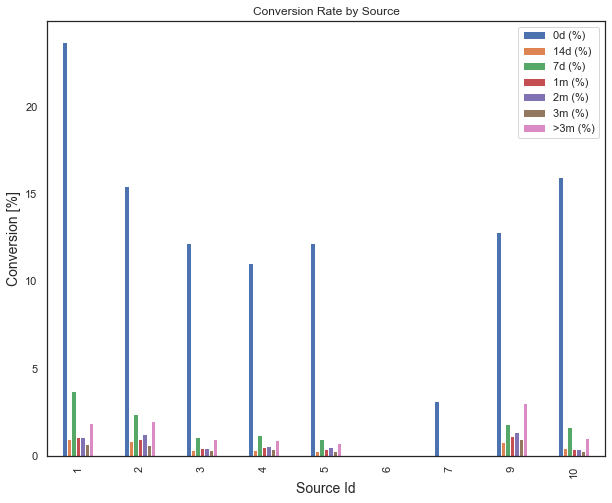

In [62]:
conversion_pivot.plot(kind='bar',figsize=[10,8])
plt.xlabel('Source Id', fontsize=14)
plt.ylabel('Conversion [%]', fontsize=14)
plt.title('Conversion Rate by Source')
plt.show()

It turns out that source 1 had the highest conversion rates for orders made within 0 and 7 days from the date of the first visit. Source 9, on the other hand, had the highest conversion of order made after more than 3 months from the visit date.

#### How many orders do they make during a given period of time?

In [63]:
orders['order_day'] = orders['buy ts'].astype('datetime64[D]')
orders['order_week'] = orders['buy ts'].astype('datetime64[W]')
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')

In [64]:
orders=orders.merge(source, on='uid', how='right')
orders=orders.dropna()
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49941 entries, 3 to 220905
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   buy ts            49941 non-null  datetime64[ns]
 1   revenue           49941 non-null  float64       
 2   uid               49941 non-null  uint64        
 3   first_order_date  49941 non-null  datetime64[ns]
 4   order_day         49941 non-null  datetime64[ns]
 5   order_week        49941 non-null  datetime64[ns]
 6   order_month       49941 non-null  datetime64[ns]
 7   index             49941 non-null  int64         
 8   source id         49941 non-null  int64         
dtypes: datetime64[ns](5), float64(1), int64(2), uint64(1)
memory usage: 3.8 MB


In [65]:
daily_orders=orders.groupby(['order_day']).agg({'uid': 'count'}).reset_index()
weekly_orders=orders.groupby(['order_week']).agg({'uid': 'count'}).reset_index()
monthly_orders=orders.groupby(['order_month']).agg({'uid': 'count'}).reset_index()

In [66]:
fig = px.bar(monthly_orders, x='order_month', y='uid', color='order_month', title= 'Monthly Orders', labels={'order_month':'Month','uid':'Number of Orders'})
fig.show()

In [67]:
monthly_orders['uid'].median()

4296.0

We can see that December was the month with the highest amount of purchases, whereas August was the lowest. 
Interestingly, if we compare this chart with the chart representing a number of visits, we can see that the results reached in August can be a reflection of the MAU results for that month, which were the lowest in the examined period.
Although November outnumbered any other month in terms of MAU, it was reflected in sales only in December. 
Looking at the sources of users who made orders we can see that Source 4 and 3 brought the highest number of orders.

In [68]:
fig = px.bar(weekly_orders, x='order_week', y='uid', title= 'Weekly Orders', labels={'order_week':'Week','uid':'Number of Orders'})
fig.show()

Looking at the weekly distribution of orders gives us a more detailed look at the relation between number of visits and sales. Similarly to the number of visits, the highest sales were reached in the fourth week of November. 

In [69]:
fig = px.line(daily_orders, x='order_day', y='uid', title= 'Daily Orders', labels={'order_day':'Day','uid':'Number of Orders'})
fig.show()

The `Daily Orders` graph clearly shows a correlation between visits and orders with the peaks and lows being a refletion in the peaks and lows in terms of visits.

In [70]:
monthly_orders_source=orders.groupby(['order_month','source id']).agg({'uid': 'count'}).reset_index()

In [71]:
fig = px.bar(monthly_orders_source, x='source id', y='uid', title= 'Monthly Orders', color='order_month', labels={'source id':'Source','uid':'Number of Orders'})
fig.show()

The classification of number of orders by source shows that source 4,3,5 brought the highest number of sales. Source 6-8 in turn, did not bring any results.

In [72]:
orders_source=orders.groupby(['source id']).agg({'buy ts': 'count', 'order_month': 'nunique'}).reset_index()
orders_source['average_n_orders']=(orders_source['buy ts']/orders_source['order_month']).round()
orders_source.sort_values(by='average_n_orders', ascending=False)

,source id,buy ts,order_month,average_n_orders
3,4,12090,13,930.0
2,3,10823,12,902.0
4,5,9164,12,764.0
1,2,7635,12,636.0
0,1,6777,12,565.0
6,9,2013,12,168.0
7,10,1438,12,120.0
5,7,1,1,1.0


In [73]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

In [74]:
cohort_grouped_orders = orders.groupby(['first_order_month','order_month']).agg({'uid':'nunique','buy ts':'count'}).reset_index()
cohort_grouped_orders.head()             

,first_order_month,order_month,uid,buy ts
0,2017-06-01,2017-06-01,2003,2333
1,2017-06-01,2017-07-01,61,177
2,2017-06-01,2017-08-01,50,174
3,2017-06-01,2017-09-01,54,226
4,2017-06-01,2017-10-01,88,292


In [75]:
cohort_grouped_orders['orders_per_user']=cohort_grouped_orders['buy ts']/cohort_grouped_orders['uid']
cohort_grouped_orders = cohort_grouped_orders.reset_index()
cohort_grouped_orders['cohort_lifetime'] = (cohort_grouped_orders['order_month'] - cohort_grouped_orders['first_order_month'])
cohort_grouped_orders['cohort_lifetime']=cohort_grouped_orders['cohort_lifetime']/np.timedelta64(1,'M')
cohort_grouped_orders['cohort_lifetime']=cohort_grouped_orders['cohort_lifetime'].round().astype('int')
cohort_grouped_orders['first_order_month'] = cohort_grouped_orders['first_order_month'].dt.strftime('%Y-%m')
orders_per_user_pivot = cohort_grouped_orders.pivot_table(index='first_order_month',columns='cohort_lifetime',values='orders_per_user',aggfunc='mean')
orders_per_user_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.164753,2.901639,3.480000,4.185185,3.318182,3.253731,4.451613,3.702128,3.655172,3.400000,2.133333,1.622642
2017-07,1.137677,1.923077,2.105263,1.625000,1.469388,2.157895,1.694444,1.282051,1.380952,1.090909,2.038462,NaN
2017-08,1.119205,1.862069,1.886792,1.840909,2.125000,1.937500,1.633333,1.772727,2.421053,1.483871,NaN,NaN
2017-09,1.137877,1.684615,1.610000,2.216216,1.294118,1.703125,1.646154,1.513514,1.418605,NaN,NaN,NaN
2017-10,1.145488,1.526829,1.317073,1.329670,1.387097,1.430556,1.535714,1.865672,NaN,NaN,NaN,NaN
2017-11,1.179931,1.799087,1.521008,1.990566,1.679012,1.229167,1.645161,NaN,NaN,NaN,NaN,NaN
2017-12,1.153811,1.849315,1.970588,1.845361,1.720000,1.666667,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.123086,1.964912,1.915663,1.488372,1.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.122573,1.881356,1.431034,1.763158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Average customer orders number'}, xlabel='cohort_lifetime', ylabel='first_order_month'>

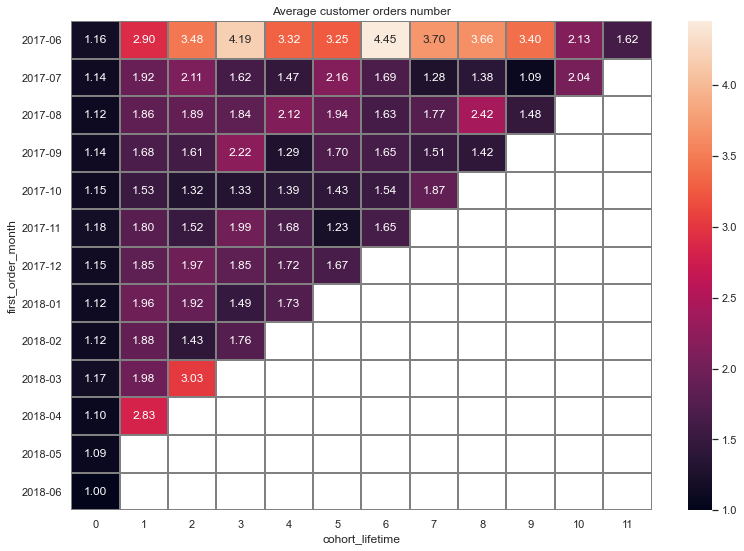

In [76]:
plt.figure(figsize=(13, 9))
plt.title('Average customer orders number')
sns.heatmap(orders_per_user_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 

The graph representing the orders/user per cohort shows how each month affected the average number of orders.

It shows that the First Cohort is the most successful when it comes to average number of orders per user. The second most successful cohort was 2017-08.

The cohort with the lowest number of order was 2017-10.

#### What is the average purchase size?

In [77]:
orders['revenue'].max()

2633.28

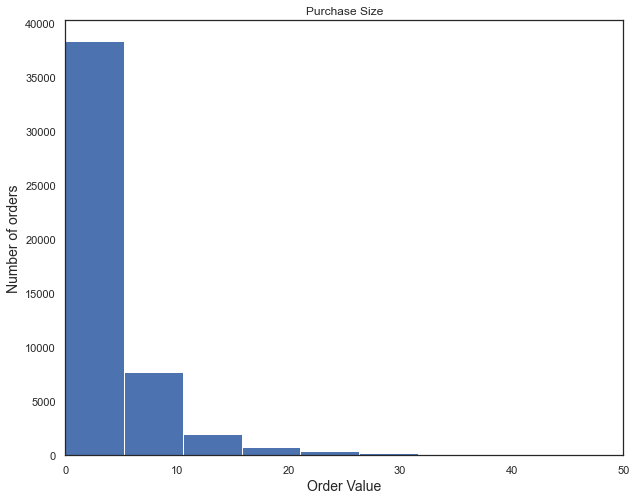

In [78]:
plt.figure(figsize=[10,8])
plt.xlabel('Order Value', fontsize=14)
plt.ylabel('Number of orders', fontsize=14)
plt.xlim(xmin=0, xmax = 50)
plt.title('Purchase Size')
plt.hist(orders['revenue'],bins=500)
plt.show()

In [79]:
orders['revenue'].describe()

count    49941.000000
mean         5.009458
std         21.915878
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

Looking at the histogram above, we can see that:
1. It is extremely skewed to the right,
2. 75% of the orders' revenue was below 5.

In [80]:
orders['revenue'].mode()

0    1.83
dtype: float64

The most common order revenue was 1.83.

In [81]:
revenue_source=orders.groupby(['source id']).agg({'revenue':'median'})
revenue_source.sort_values(by='revenue',ascending=False)

,revenue
source id,
5,2.81
1,2.75
2,2.75
4,2.62
3,2.44
9,2.14
10,1.82
7,1.22


The highest average revenue/order came from source 5,1 and 2.

Let's look at the average revenue/order by cohorts:

In [82]:
cohort_grouped = orders.groupby('first_order_month').agg({'buy ts':'count','uid':'nunique','revenue':'sum'})
cohort_grouped['avg_purchase']=(cohort_grouped['revenue']/cohort_grouped['buy ts']).round()
cohort_grouped.sort_values(by='avg_purchase', ascending=False)

,buy ts,uid,revenue,avg_purchase
first_order_month,,,,
2017-09-01,3848,2553,34555.73,9.0
2017-07-01,2889,1903,16073.71,6.0
2017-12-01,5837,4330,33246.51,6.0
2017-06-01,4417,2003,23917.70,5.0
2017-08-01,2176,1359,11583.92,5.0
2017-10-01,5952,4289,27471.37,5.0
2017-11-01,5857,4046,25954.42,4.0
2018-01-01,4266,3331,16521.48,4.0
2018-02-01,4420,3606,16486.71,4.0


Cohorts with the highest average purchase were 2017-09-01, 2017-07-01 and 2017-12-01.

In [83]:
daily_revenue=orders.groupby(['order_day']).agg({'revenue': 'sum'}).reset_index()
weekly_revenue=orders.groupby(['order_week']).agg({'revenue': 'sum'}).reset_index()
monthly_revenue=orders.groupby(['order_month']).agg({'revenue': 'sum'}).reset_index()

An average revenue per period of time:

In [84]:
daily_revenue.median()

<ipython-input-84-cbb5924a27fb>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



revenue    589.215
dtype: float64

In [85]:
weekly_revenue.median()

<ipython-input-85-b55cd8d4ebfc>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



revenue    4429.18
dtype: float64

In [86]:
monthly_revenue.median()

<ipython-input-86-52d7fcb6d8fc>:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



revenue    19266.2
dtype: float64

#### How much money do they bring? (LTV)

In [87]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [88]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

In [89]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

In [90]:
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [91]:
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m')

In [92]:
report['ltv'] = report['revenue'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')

In [93]:
output=output.cumsum(axis=1).round(2)

<AxesSubplot:title={'center':'LTV per Cohorts'}, xlabel='age', ylabel='first_order_month'>

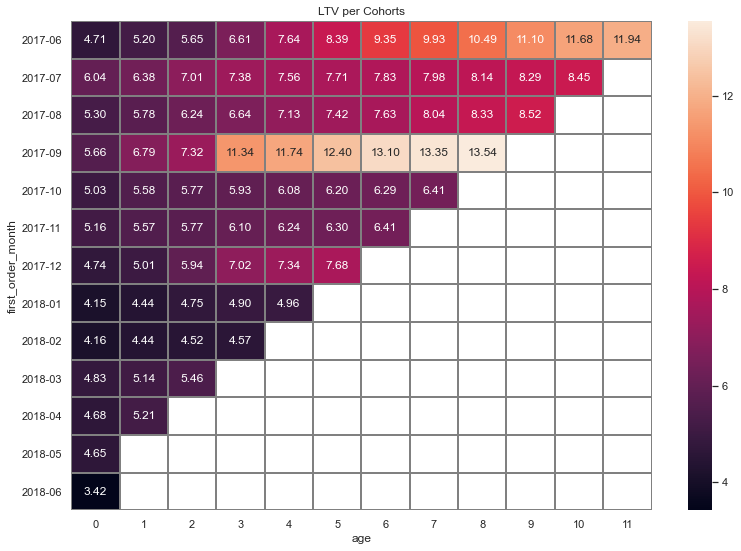

In [94]:
plt.figure(figsize=(13, 9))
plt.title('LTV per Cohorts')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 

Looking at the LTV per cohorts, we can see that the cohort 2017-09 and the first cohort have the highest LTV compare to the other cohorts on their 4th and 6th months.

In [95]:
revenue_per_source=orders.groupby(['source id']).agg({'revenue':'sum'})

In [96]:
clients_per_source=orders.groupby(['source id']).agg({'uid': 'nunique'}).reset_index()
clients_per_source=clients_per_source.drop_duplicates()
clients_per_source

,source id,uid
0,1,3761
1,2,4249
2,3,9020
3,4,9690
4,5,6758
5,7,1
6,9,1376
7,10,1226


In [97]:
revenue_per_source=revenue_per_source.merge(clients_per_source, on='source id', how='right').reset_index()

In [98]:
revenue_per_source['ltv']=revenue_per_source['revenue']/revenue_per_source['uid']

In [99]:
fig = px.bar(revenue_per_source, x='source id', y='ltv',color='source id', title= 'LTV per source', labels={'source id':'Source','ltv':'LTV'})
fig.show()

The LTV by source indicates source 2 and 1 as the sources with the highest LTV value for their users, at least 1.5 times bigger then the other sources.

### Conclusion:

After analyzing the sales of our product, we found out that:
- The overwherlming majority of clients buys the products the same day of as their first visit takes place, or even the order is their first visit, 
- the fastes conversion rate was achieved by source 1,
- August was the month with the lowerst n. of orders (below 2000) whereas November was the highest (over 6000),
- The lowest week in terms of n. of orders was the first week of august (319 orders), compared to the highest - 4th week of November (above 2000 orders),
- sources 4,3,5 brought the highest number of orders,
- 75% of orders's value is below 5, with the most common value per order being 1.83,
- Cohorts with the highest average purchase were 2017-09-01, 2017-07-01 and 2017-12-01,
- In terms of the LTV, the highest scoring Cohorts were the fourth and the first cohort.
- source 2 and 1 as the sources with the highest LTV value for their users.

### 4. Marketing Analysis

#### How much money was spent? Overall/per source/over time

In [100]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [101]:
costs['costs'].sum()

329131.62

In [102]:
costs_per_source=costs.groupby(['source_id']).agg({'costs':'sum'}).reset_index()
fig = px.bar(costs_per_source, x='source_id', y='costs',color='source_id', title= 'Total costs per source', labels={'source_id':'Source','costs':'total cost'})
fig.show()

The graph clearly shows that Source 3 was more than twice as expensive as the next most expensive source. 

In [103]:
costs['cost_day'] = costs['dt'].astype('datetime64[D]')
costs['cost_week'] = costs['dt'].astype('datetime64[W]')
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

In [104]:
costs_daily=costs.groupby(['cost_day']).agg({'costs':'sum'}).reset_index()
costs_weekly=costs.groupby(['cost_week']).agg({'costs':'sum'}).reset_index()
costs_monthly=costs.groupby(['cost_month']).agg({'costs':'sum'}).reset_index()

In [105]:
fig = px.bar(costs_monthly, x='cost_month', y='costs', title= 'Monthly Costs', labels={'cost_month':'Month','costs':'Costs'})
fig.show()

Looking at the monthly expenses, we can see the direct correlation between the spending and sales: e.g. December was a month with the highest sales/costs, whereas August had both lowest spending and the lowest sales results.

In [106]:
fig = px.bar(costs_weekly, x='cost_week', y='costs', title= 'Weekly Costs', labels={'cost_week':'Week',"costs":'Costs'})
fig.show()

The `Weekly Costs` chart again shows the direct correlation between the peak and the low point of sales: 4th week of November being the peak and the first week of August being the lowest. 

In [107]:
fig = px.line(costs_daily, x='cost_day', y='costs', title= 'Daily Costs', labels={'cost_day':'Day','costs':'Costs'})
fig.show()

The daily distribution of costs shows clearly that the day of almost no visits and sales (31st March), did not have almost any spendings on marketing. 

The question arises- was the lowest rate of visits and sales cause by the lack of marketing investments, or was it caused by different factors (e.g. technical issues)? 

#### How much did customer acquisition from each of the sources cost?

In [108]:
costs_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [109]:
costs_per_source.columns=['source id', 'costs']

In [110]:
costs_per_source_clients=costs_per_source.merge(clients_per_source, on='source id', how='right')
costs_per_source_clients['cac']=costs_per_source_clients['costs']/costs_per_source_clients['uid']
costs_per_source_clients

,source id,costs,uid,cac
0,1,20833.27,3761,5.539290
1,2,42806.04,4249,10.074380
2,3,141321.63,9020,15.667586
3,4,61073.60,9690,6.302745
4,5,51757.10,6758,7.658642
5,7,NaN,1,NaN
6,9,5517.49,1376,4.009804
7,10,5822.49,1226,4.749176


In [111]:
fig = px.bar(costs_per_source_clients, x='source id', y='cac',color='source id', title= 'CAC per source', labels={'source_id':'Source','cac':'CAC'})
fig.show()

The sources with the highest CAC were: 3,2,5.

In [112]:
costs_monthly.columns=['first_order_month', 'costs']

In [113]:
cac_cohorts=costs_monthly.merge(cohort_sizes, on='first_order_month', how='right')
cac_cohorts['cac']=cac_cohorts['costs']/cac_cohorts['n_buyers']
cac_cohorts['first_order_month'] = cac_cohorts['first_order_month'].dt.strftime('%Y-%m')

In [114]:
cac_cohorts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   first_order_month  13 non-null     object 
 1   costs              12 non-null     float64
 2   n_buyers           13 non-null     int64  
 3   cac                12 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 520.0+ bytes


In [115]:
fig = px.bar(cac_cohorts, x='first_order_month', y='cac',color='first_order_month', title= 'CAC per cohort', labels={'first_order_month':'Cohort','cac':'CAC'})
fig.show()

The cohorts with the highest CAC were the April, January and August cohorts. 
It is worth mentioning that in case of August, the high CAC might be caused by the low number of visits. However, it should be further investigated whether the low result in the month of August are a yearly phenomenon caused by external factors.

#### How worthwhile where the investments? (ROI)

In [116]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 0 to 78
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   first_order_month  79 non-null     object        
 1   n_buyers           79 non-null     int64         
 2   order_month        79 non-null     datetime64[ns]
 3   revenue            79 non-null     float64       
 4   age                79 non-null     int64         
 5   ltv                79 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 4.3+ KB


In [117]:
costs_monthly['first_order_month'] = costs_monthly['first_order_month'].dt.strftime('%Y-%m')

In [118]:
total_ltv = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round()

In [119]:
report_ = report.merge(costs_monthly, on='first_order_month', how='right')
report_['cac'] = report_['costs'] / report_['n_buyers']

In [120]:
report_['roi'] = report_['ltv'] / report_['cac']
output_roi = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='roi', 
    aggfunc='mean')

output_roi=output_roi.cumsum(axis=1).round(2) 

<AxesSubplot:title={'center':'ROI per Cohorts'}, xlabel='age', ylabel='first_order_month'>

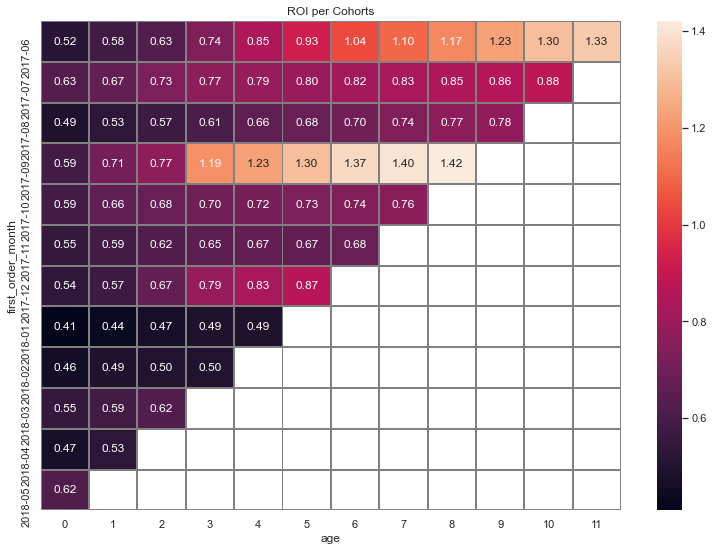

In [121]:
plt.figure(figsize=(13, 9))
plt.title('ROI per Cohorts')
sns.heatmap(output_roi, annot=True, fmt='.2f', linewidths=1, linecolor='gray') 

The profitable cohorts were the first (after 6 months) and fourth cohort (after 3 months). The January cohort was the least profitable.

In [122]:
revenue_per_source=orders.groupby(['source id']).agg({'revenue':'sum'}).reset_index()

In [123]:
revenue_per_source

,source id,revenue
0,1,39160.46
1,2,65326.22
2,3,43845.34
3,4,51073.39
4,5,39885.94
5,7,1.22
6,9,6832.80
7,10,4051.99


In [124]:
roi_source=costs_per_source_clients.merge(revenue_per_source, on='source id', how='right')
roi_source['ltv']=roi_source['revenue']/roi_source['uid']

In [125]:
roi_source['roi']=roi_source['ltv']/roi_source['cac']
roi_source

,source id,costs,uid,cac,revenue,ltv,roi
0,1,20833.27,3761,5.539290,39160.46,10.412247,1.879708
1,2,42806.04,4249,10.074380,65326.22,15.374493,1.526098
2,3,141321.63,9020,15.667586,43845.34,4.860902,0.310252
3,4,61073.60,9690,6.302745,51073.39,5.270732,0.836260
4,5,51757.10,6758,7.658642,39885.94,5.902033,0.770637
5,7,NaN,1,NaN,1.22,1.220000,NaN
6,9,5517.49,1376,4.009804,6832.80,4.965698,1.238389
7,10,5822.49,1226,4.749176,4051.99,3.305049,0.695920


In [126]:
fig = px.bar(roi_source, x='source id', y='roi',color='source id', title= 'ROI per source', labels={'source_id':'Source','roi':'ROI'})
fig.show()

Looking at the classification of ROI per Source, the profitable sources were 1,2 and 9. 
Source n.3 appeared as the least profitable.

#### Conclusion: 
Throughout the Marketing Analysis, we found out that: 
- Source 3 was more than twice as expensive as the next most expensive source. 
- There is a direct correlation between the spending and sales: e.g. December was a month with the highest sales/costs, whereas August had both lowest spending and the lowest sales results.
- The cohorts with the highest CAC were the April, January and August cohorts. 
- The sources with the highest CAC were: 3,2,1.
- The most profitable cohorts were the first and fourth cohort. 
- The January cohort was the least profitable.
- Sources with the highest ROI were 1,2 and 9. 
- Source n.3 appeared as the least profitable.

Remaining questions: 
- Was the lowest rate of visits and sales on 31st March caused by a lack of marketing investments, or was it caused by different factors (e.g. technical issues)? 

### 5. Conclusion and recommendations

The analysis of product, sales and marketing gave us the following conclusions: 

 - There was a significant growth in the number of active users September 2017 and even bigger increase in the number of users in October 2017. The peak in the number of users was reached in November.


- The dynamics of the number of daily visits follow a low-high-low pattern within specific time periods of ca. 6-8 days;


- The number of daily visits incresed and remained above 1000, however, after the rapid decrease on March 30th, the number of visits remained below that figure for most part.


- The most often occuring sessions' lenght is 60 sec, 25% of the Sesions are within 120 sec, 50% would not exceed 360 and the upper limit of the third quartile would be 900 sec.


- Users on average spent 4 times more time visiting the website on a desktop than on a touch device.


- The first cohort had the best results when it comes to User Retention. The general trend shows that the amount of users who came back to use the product has been decreasing with each cohort.


- The overwherlming majority of clients buys the products the same day of as their first visit takes place, or even the order is their first visit.


- the fastest conversion rate was achieved by source 1.


- August was the month with the lowerst n. of orders, whereas November was the highest.


- Sources 4,3,5 brought the highest number of orders.


- 75% of orders's value is below 5, with the most common value per order being 1.83.


- Cohorts with the highest average purchase were 2017-09-01, 2017-07-01 and 2017-12-01.


- In terms of the LTV, the highest scoring Cohorts were the fourth and the first cohort.


- Source 2 and 1 as the sources with the highest LTV value for their users.


- Source 3 was more than twice as expensive as the next most expensive source. 


- There is a direct correlation between the spending and sales.


- The cohorts with the highest CAC were the April, January and August cohorts. 


- The sources with the highest CAC were: 3,2,5.


- The profitable cohorts were the first and fourth cohort.


- The January cohort was the least profitable.


- The profitable sources were 1,2 and 9. 


- Source n.3 appeared as the least profitable.

Reccommendations: 
From the analysis we can conclude, that: 

- the retention rate should be improved in order to drive more sales and improve the customer success, 


- the version of the product available on touch devices needs further analysis- from the time spend on different devices it seems that its desktop version is more cofortable to use, 


- the marketing investments should focus on the sources which give the high conversion rate, LTV and ROI values (1,2,9) and shift away from the least profitable ones (3).


It should be further investigated: 


- what are the yearly trends in terms of vists and sales? Are there specific months which have low/high results due to external factors? 


- How do different days of the week influence the number of visits and sales? Is the increase connected to weekends? 


- Was the lowest rate of visits and sales on 31st March caused by a lack of marketing investments, or was it caused by different factors (e.g. technical issues)? 


- What caused an initial increase in retention and LTV of the fourth cohort? Were any new features/ offers/ campaigns introduced at that stage?